In [1]:
import numpy as np

#parameters
rad = 10
thk = 5
sep = 5

#n data points,(x1,y1) are the coordinates of the top semi-circle
def generatedata(rad,thk,sep,n,x1=0,y1=0):
    # center of the top semi-circle
    X1 = x1
    Y1 = y1

    # center of the bottom semi-circle
    X2 = X1 + rad + thk / 2
    Y2 = Y1 - sep
    
    # data points in the top semi-circle
    top = []
    # data points in the bottom semi-circle
    bottom = []
    
    # parameters
    r1 = rad + thk
    r2 = rad
    
    cnt = 1
    while(cnt <= n):
        #uniformed generated points
        x = np.random.uniform(-r1,r1)
        y = np.random.uniform(-r1,r1)
        
        d = x**2 + y**2
        if(d >= r2**2 and d <= r1**2):
            if (y > 0):
                top.append([X1 + x,Y1 + y])
                cnt += 1
            else:
                bottom.append([X2 + x,Y2 + y])
                cnt += 1
        else:
            continue

    return top,bottom

In [2]:
import matplotlib.pyplot as plt
top,bottom = generatedata(rad,thk,sep,1000)

X1 = [i[0] for i in top]
Y1 = [i[1] for i in top]

X2 = [i[0] for i in bottom]
Y2 = [i[1] for i in bottom]

plt.scatter(X1,Y1,s = 1)
plt.scatter(X2,Y2,s = 1)
plt.show()

<Figure size 640x480 with 1 Axes>

In [3]:
# pre-processing the data for (a)
x1 = [[1] + i + [1] for i in top]
x2 = [[1] + i + [-1] for i in bottom]
data = x1 + x2
    
data = np.array(data)
np.random.shuffle(data)

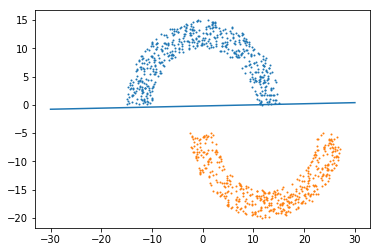

In [4]:
x1=[[1]+i+[1] for i in top]
x2=[[1]+i+[-1] for i in bottom]
data=x1+x2
    
data=np.array(data)
np.random.shuffle(data)

#PLA
def sign(x):
    if x>0:
        return 1
    else:
        return -1

#define the judge function, check if all data has been successfully classified.
def Judge(x,w):
    #n dimensional data
    n=x.shape[1]-1
    flag=1
    for i in x:
        if sign(i[:n].dot(w))*i[-1]<0:
            flag=0
            break
    return flag

#define PLA ,k is the step
def PLA(x,k):
    m,n=x.shape
    n-=1

    w=np.zeros(n)

    last=0

    t=0
    if Judge(x,w):
        pass
    else:
        j=0
        while Judge(x,w)==0:
            i=x[j]
            #print(i[:n],i[-1])
            if sign(i[:n].dot(w))*i[-1]<0:
                w+=k*i[-1]*i[:n]
                t+=1
                last=j
            j+=1
            if(j>=m):
                j=j%m
    return t,last,w
t,last,w=PLA(data,1)

#plot
r=2*(rad+thk)
X3=[-r,r]
Y3=[-(w[0]+w[1]*i)/w[2] for i in X3]

plt.scatter(X1,Y1,s=1)
plt.scatter(X2,Y2,s=1)
plt.plot(X3,Y3)
plt.show()

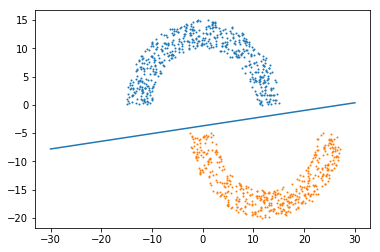

In [5]:
from numpy.linalg import inv


x1=[[1]+i for i in top]
y1=[1]*len(top)

x2=[[1]+i for i in bottom]
y2=[-1]*len(bottom)

X=np.array(x1+x2)
Y=np.array(y1+y2)

w1=inv(X.T.dot(X)).dot(X.T).dot(Y)


t=2*(rad+thk)
X4=[-t,t]
Y4=[-(w1[0]+w1[1]*i)/w1[2] for i in X4]


plt.scatter(X1,Y1,s=1)
plt.scatter(X2,Y2,s=1)
plt.plot(X4,Y4)
plt.show()

In [6]:
import numpy as np

rad=10
thk=5
sep=np.arange(0.2,5.2,0.2)

T=np.array([])

for k in sep:
    top,bottom=generatedata(rad,thk,k,2000,5,10)
    x1=[[1]+i+[1] for i in top]
    x2=[[1]+i+[-1] for i in bottom]
    data=x1+x2

    data=np.array(data)
    np.random.shuffle(data)
    
    n=len(data[0])-1
    m=len(data)
    
    t,last,w=PLA(data,1)
    
    T=np.append(T,t)

/usr/local/lib/python3.7/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


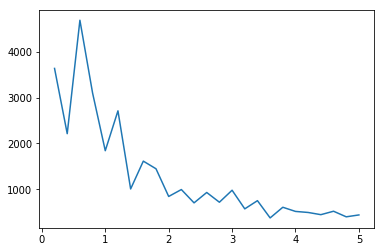

In [7]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] 

plt.plot(sep,T)
plt.show()

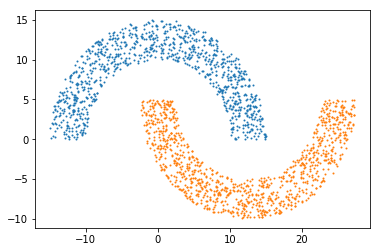

In [8]:
#3.3


rad=10
thk=5
sep=-5

top,bottom=generatedata(rad,thk,sep,2000)

X1=[i[0] for i in top]
Y1=[i[1] for i in top]

X2=[i[0] for i in bottom]
Y2=[i[1] for i in bottom]

plt.scatter(X1,Y1,s=1)
plt.scatter(X2,Y2,s=1)
plt.show()

In [9]:
#Pocket PLA

def sign(x):
    if x>0:
        return 1
    else:
        return -1


def CountError(x,w):

    n=x.shape[1]-1
    count=0
    for i in x:
        if sign(i[:n].dot(w))*i[-1]<0:
            count+=1
    return count


def PocketPLA(x,k,maxnum):
    m,n=x.shape
    n-=1
    w=np.zeros(n)
    w0=np.zeros(n)
    error=CountError(x,w)
    Error=[]
    if error==0:
        pass
    else:
        j=0
        while (j<maxnum or error==0):
            k=np.random.randint(0,m)
            i=x[k]
            w=w0+k*i[-1]*i[:n]
            error1=CountError(x,w)
            if error>error1:
                w0=w[:]
                error=error1
            Error.append(error)
            j+=1
    return w0,Error

In [10]:

x1=[[1]+i+[1] for i in top]
x2=[[1]+i+[-1] for i in bottom]
data=x1+x2
    
data=np.array(data)
np.random.shuffle(data)

num=10000

w,error=PocketPLA(data,1,num)

/usr/local/lib/python3.7/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


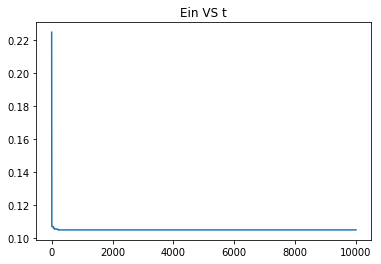

In [11]:
t=np.arange(num)
plt.plot(t,np.array(error)/data.shape[0])
plt.title('Ein VS t')
plt.show()


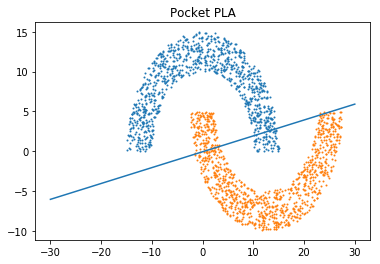

Pocket PLA的错误率0.105


In [12]:
plt.scatter(X1,Y1,s=1)
plt.scatter(X2,Y2,s=1)
t=2*(rad+thk)
X3=[-t,t]
Y3=[-(w[0]+w[1]*i)/w[2] for i in X3]
plt.plot(X3,Y3)
plt.title('Pocket PLA')
plt.show()
print('Pocket PLA Error rate'+str(CountError(data,w)/data.shape[0]))

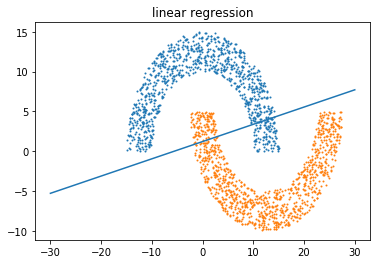

linear regression的错误率0.108


In [13]:

x1=[[1]+i for i in top]
y1=[1]*len(top)

x2=[[1]+i for i in bottom]
y2=[-1]*len(bottom)

X=np.array(x1+x2)
Y=np.array(y1+y2)

w1=inv(X.T.dot(X)).dot(X.T).dot(Y)

#plot
t=2*(rad+thk)
X4=[-t,t]
Y4=[-(w1[0]+w1[1]*i)/w1[2] for i in X4]

plt.scatter(X1,Y1,s=1)
plt.scatter(X2,Y2,s=1)
plt.plot(X4,Y4)
plt.title('linear regression')
plt.show()
print('linear regression error'+str(CountError(data,w1)/data.shape[0]))

In [14]:


def transform(data):
    result=[]
    for i in data:
        x1=i[1]
        x2=i[2]
        flag=i[-1]
        x=[1,x1,x2,x1*x2,x1**2,x2**2,x1**3,(x1**2)*x2,x1*(x2**2),x2**3,flag]
        result.append(x)
    return np.array(result)

newdata=transform(data)

def f(x,y,w):
    return w[0]+w[1]*x+w[2]*y+w[3]*x*y+w[4]*(x**2)+w[5]*(y**2)+w[6]*(x**3)+w[7]*(x**2)*y+w[8]*x*(y**2)+w[9]*y**3

n = 2000
x = np.linspace(-t, t, n)
y = np.linspace(-t, t, n)


X, Y = np.meshgrid(x, y)

In [15]:
num=10000

w,error=PocketPLA(newdata,1,num)

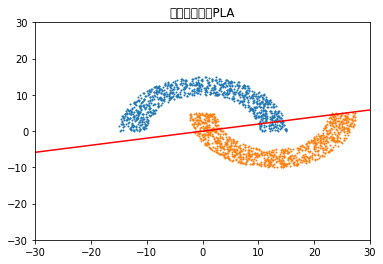

特征转换后的错误率为0.105


In [16]:
plt.contour(X, Y, f(X, Y,w), 1, colors = 'red')
plt.scatter(X1,Y1,s=1)
plt.scatter(X2,Y2,s=1)
plt.title('characte change')
plt.show()
print(str(CountError(newdata,w)/newdata.shape[0]))

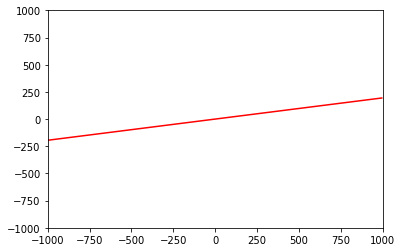

In [17]:
t=1000
n=10000
x = np.linspace(-t, t, n)
y = np.linspace(-t, t, n)

X, Y = np.meshgrid(x, y)
plt.contour(X, Y, f(X, Y,w), 1, colors = 'red')
plt.show()

In [18]:

n = 10000
x = np.linspace(-100, 100, n)
y = np.linspace(-100, 100, n)

X, Y = np.meshgrid(x, y)

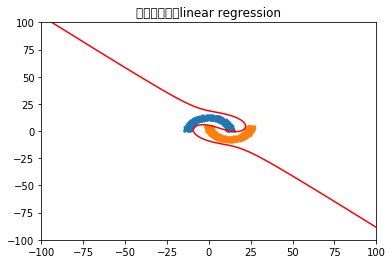

特征转换后的错误率为0.0045


In [19]:
Xnew=newdata[:,:-1]
Ynew=newdata[:,-1]

w1=inv(Xnew.T.dot(Xnew)).dot(Xnew.T).dot(Ynew)

plt.contour(X, Y, f(X, Y,w1), 1, colors = 'red')
plt.scatter(X1,Y1,s=1)
plt.scatter(X2,Y2,s=1)
plt.title('linear regression')
plt.show()
print('error'+str(CountError(newdata,w1)/newdata.shape[0]))